To obtain the classification of various classes using k-Nearest
Neighbor approach


In [25]:
# 1.	Load the basic libraries and packages

import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
# 2.	Load the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class"]
dataset = pd.read_csv(url, names=names)

In [12]:
# 3.	Analyse the dataset

dataset.describe()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [13]:
# 4.	Pre-process the data

traningclass = dataset.values[:, -1]
unique_list = list(set(traningclass))

for i in range(len(traningclass)):
    for j in range(len(unique_list)):
        if traningclass[i] == unique_list[j]:
            traningclass[i] = j

traningclass = traningclass[:-1]

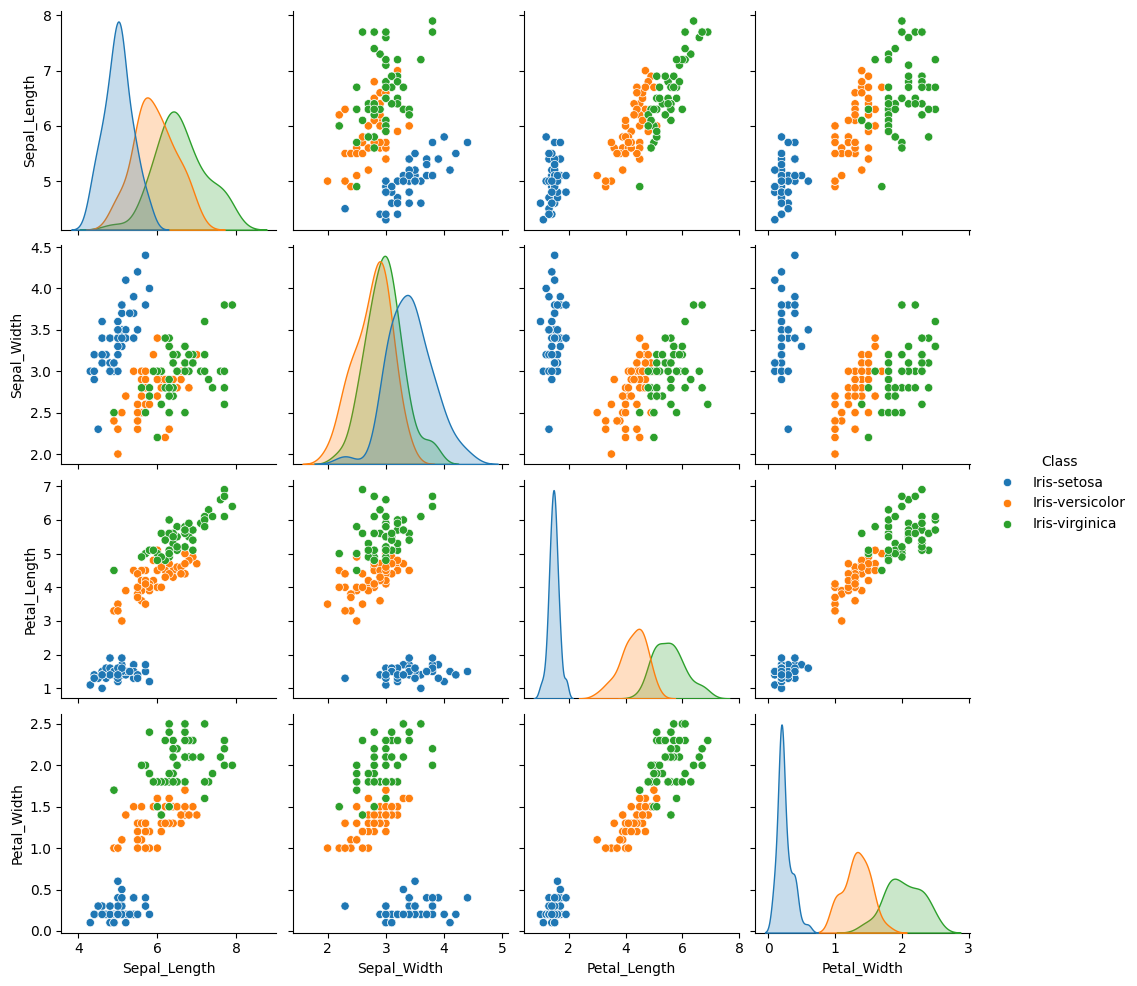

In [14]:
# 5.	Visualize the Data

sns.pairplot(dataset, hue="Class")
plt.show()

In [15]:
# 6.	Separate the feature and prediction value columns

training = dataset.values[:, :-1]
testing = dataset.values[149, :-1]
training = dataset.values[:149, :-1]

In [17]:
# 7.	Select the number K of the neighbors

k = 25

In [19]:
# 8.	Calculate the Euclidean distance of K number of neighbors

def Euclidean_Distance(row_i, row_j):
    distance = 0.0
    for i in range(len(row_i)):
        distance += (row_i[i] - row_j[i])**2
    return np.sqrt(distance)

distance = []
for i in range(len(training)):
    dist = Euclidean_Distance(training[i], testing)
    distance.append([dist, traningclass[i]])

In [20]:
# 9.	Take the K nearest neighbors as per the calculated Euclidean distance.

# Sort the distances and select the first k
distance.sort()
k_nearest_neighbors = distance[:k]

In [21]:
# 10.	Among these k neighbors, count the number of the data points in each category.

# Count occurrences of each class in the K nearest neighbors
result = {}
for dist, label in k_nearest_neighbors:
    result[label] = result.get(label, 0) + 1

In [22]:
# 11.	Assign the new data points to that category for which the number of the neighbor is maximum.

max_key = max(result, key=result.get)
class_name = unique_list[max_key]
print("Predicted Class:", class_name)

Predicted Class: Iris-virginica


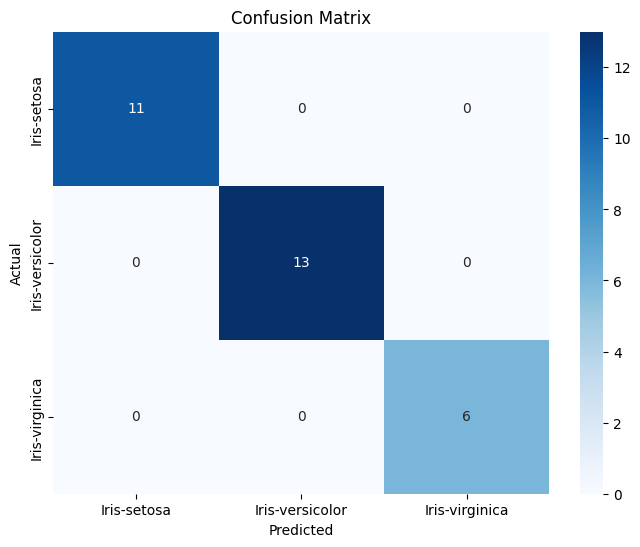

In [24]:
# 1. Confusion Matrix

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
# 2. Print The Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
